# Random Search

Random Search é uma técnica de otimização utilizada para encontrar os melhores hiperparâmetros de um modelo de machine learning. Ao contrário de métodos como Grid Search, que exploram sistematicamente todas as combinações possíveis de hiperparâmetros, o Random Search seleciona aleatoriamente combinações de hiperparâmetros dentro de um espaço de busca definido.

## Vantagens do Random Search

1. **Eficiência**: Em muitos casos, o Random Search pode encontrar boas combinações de hiperparâmetros mais rapidamente do que o Grid Search, especialmente quando o número de hiperparâmetros é grande.
2. **Exploração do Espaço de Busca**: Como as combinações são selecionadas aleatoriamente, há uma maior probabilidade de explorar diferentes regiões do espaço de busca, o que pode levar a encontrar melhores soluções.
3. **Facilidade de Implementação**: O Random Search é simples de implementar e pode ser facilmente paralelizado para acelerar o processo de busca.

## Como Funciona

1. **Definição do Espaço de Busca**: Primeiro, define-se o espaço de busca para cada hiperparâmetro. Isso pode incluir intervalos contínuos ou conjuntos discretos de valores.
2. **Amostragem Aleatória**: Em seguida, amostras aleatórias são geradas a partir do espaço de busca definido.
3. **Avaliação do Modelo**: Cada combinação de hiperparâmetros é avaliada utilizando uma métrica de desempenho, como acurácia, precisão, recall, etc.
4. **Seleção da Melhor Combinação**: A combinação de hiperparâmetros que resulta na melhor performance do modelo é selecionada.

## Exemplo de Implementação

Aqui está um exemplo de como implementar o Random Search utilizando a biblioteca `scikit-learn` em Python:

```python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Carregar dados
data = load_iris()
X, y = data.data, data.target

# Definir o modelo
model = RandomForestClassifier()

# Definir o espaço de busca
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Executar a busca
random_search.fit(X, y)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", random_search.best_params_)
```

## Conclusão

O Random Search é uma técnica poderosa e eficiente para a otimização de hiperparâmetros, especialmente útil quando o espaço de busca é grande e complexo. Sua simplicidade e capacidade de explorar diferentes regiões do espaço de busca o tornam uma escolha popular em muitos projetos de machine learning.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split
)

In [3]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0: 1, 1: 0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Search


In [8]:
gbm = GradientBoostingClassifier(random_state = 42)

#Determine os espaços de busca
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'loss' : ['deviance', 'exponential'],
    'max_depth' : [3, 5, 7, 9]
}

In [9]:
#Set up the search
search = RandomizedSearchCV(
    gbm, 
    param_grid, 
    scoring='roc_auc', 
    n_iter=100, 
    random_state=42, 
    cv=3, 
    n_jobs=4,
    refit = True 
)

search.fit(X_train, y_train)

c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
183 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\vish8\anaconda3\Lib\site-package

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='roc_auc')

In [10]:
search.best_params_

{'subsample': 0.5,
 'n_estimators': 300,
 'max_features': 0.5,
 'max_depth': 7,
 'loss': 'exponential',
 'learning_rate': 0.1}

In [11]:
#tambem podemos encontrar a data para todos os modelos
results = pd.DataFrame(search.cv_results_)
print(results.shape)
results.head()

(100, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_features,param_max_depth,param_loss,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.376657,0.002534,0.001999,0.000006,0.5,200,0.7,5,exponential,0.01,"{'subsample': 0.5, 'n_estimators': 200, 'max_f...",0.996280,0.981810,0.983741,0.987277,0.006415,22
1,0.050609,0.000973,0.001696,0.000220,0.5,50,0.5,3,exponential,0.50,"{'subsample': 0.5, 'n_estimators': 50, 'max_fe...",0.999628,0.981902,0.993421,0.991650,0.007344,9
2,0.000000,0.000000,0.000000,0.000000,1.0,300,0.7,5,deviance,0.50,"{'subsample': 1.0, 'n_estimators': 300, 'max_f...",NaN,NaN,NaN,NaN,NaN,40
3,0.000666,0.000471,0.000000,0.000000,0.5,300,0.7,3,deviance,0.10,"{'subsample': 0.5, 'n_estimators': 300, 'max_f...",NaN,NaN,NaN,NaN,NaN,40
4,0.000000,0.000000,0.000000,0.000000,1.0,300,0.7,3,deviance,0.01,"{'subsample': 1.0, 'n_estimators': 300, 'max_f...",NaN,NaN,NaN,NaN,NaN,40


In [12]:
#Podemos ordenar o modelo pela performance
results.sort_values('mean_test_score', ascending=False, inplace = True)
results.reset_index(drop = True, inplace = True)

results [[
    'mean_test_score', 
    'std_test_score', 
    'param_n_estimators', 
    'param_learning_rate', 
    'param_max_depth', 
    'param_subsample', 
    'param_max_features', 
    'param_loss'
]].head()

,mean_test_score,std_test_score,param_n_estimators,param_learning_rate,param_max_depth,param_subsample,param_max_features,param_loss
0,0.993987,0.004519,300,0.1,7,0.5,0.5,exponential
1,0.993056,0.005016,300,0.5,5,0.7,1.0,exponential
2,0.992802,0.004756,100,0.5,7,0.7,0.5,exponential
3,0.992684,0.005311,200,0.1,7,0.7,0.7,exponential
4,0.992572,0.006266,200,0.5,7,0.7,0.7,exponential


Text(0, 0.5, 'Parameters')

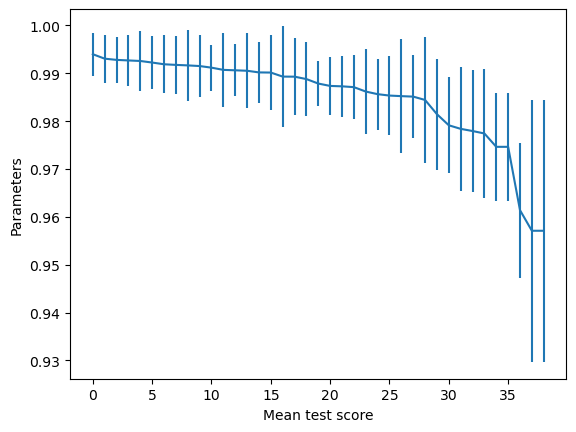

In [14]:
#plot model performance and error
results['mean_test_score'].plot(yerr = [results['std_test_score']], subplots = True)
plt.xlabel('Mean test score')
plt.ylabel('Parameters')


In [15]:
X_train_preds = search.predict_proba(X_train)[:, 1]
X_test_preds = search.predict_proba(X_test)[:, 1]

print('Train ROC AUC Score: %.2f'%roc_auc_score(y_train, X_train_preds))
print('Test ROC AUC Score: %.2f'%roc_auc_score(y_test, X_test_preds))

Train ROC AUC Score: 1.00
Test ROC AUC Score: 1.00
